In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf

In [3]:
start='2014-01-01'
end='2025-03-01'
stock="GOOG"
df=yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [32]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.624825,27.739730,27.504212,27.682899,73129082
1,2014-01-03,27.423307,27.719380,27.421570,27.671483,66917888
2,2014-01-06,27.729059,27.767277,27.459045,27.622096,71037271
3,2014-01-07,28.263626,28.284226,27.824359,27.919657,102486711
4,2014-01-08,28.322443,28.473582,28.125391,28.440823,90036218


In [33]:
df.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
2802,2025-02-24,181.190002,185.089996,180.880005,183.800003,18734000
2803,2025-02-25,177.369995,180.759995,176.770004,180.154999,20832500
2804,2025-02-26,174.699997,178.080002,173.589996,176.945007,23637200
2805,2025-02-27,170.210007,176.589996,169.751999,175.940002,25930500
2806,2025-02-28,172.220001,172.500000,168.389999,170.300003,30049800


In [34]:
df.reset_index(inplace=True)
df

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,2014-01-02,27.624825,27.739730,27.504212,27.682899,73129082
1,1,2014-01-03,27.423307,27.719380,27.421570,27.671483,66917888
2,2,2014-01-06,27.729059,27.767277,27.459045,27.622096,71037271
3,3,2014-01-07,28.263626,28.284226,27.824359,27.919657,102486711
4,4,2014-01-08,28.322443,28.473582,28.125391,28.440823,90036218
...,...,...,...,...,...,...,...
2802,2802,2025-02-24,181.190002,185.089996,180.880005,183.800003,18734000
2803,2803,2025-02-25,177.369995,180.759995,176.770004,180.154999,20832500
2804,2804,2025-02-26,174.699997,178.080002,173.589996,176.945007,23637200


In [35]:
ma_100_days=df.Close.rolling(100).mean() #moving average of 100 days ,and df.Close extract the closing price from df


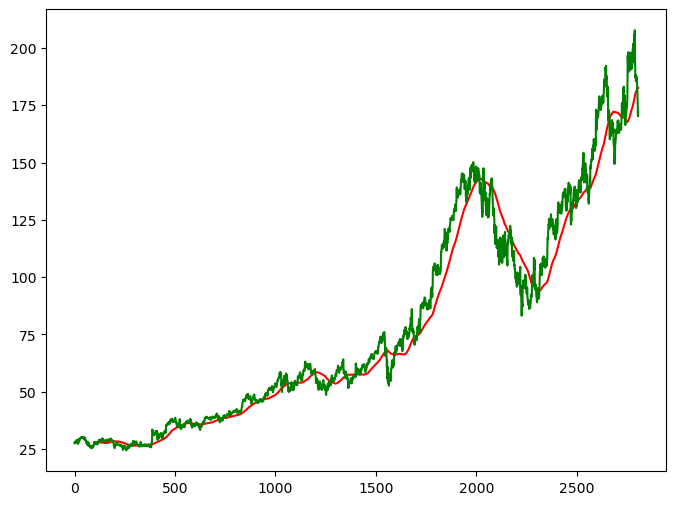

In [36]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(df.Close,'g')
plt.show()

General strategy of stock market : the red line (the avg moving line),if green line if above the avg line(RED) then the price will increase or else it will decrease

In [37]:
ma_200_days=df.Close.rolling(200).mean() #moving average of 200 days ,and df.Close extract the closing price from df


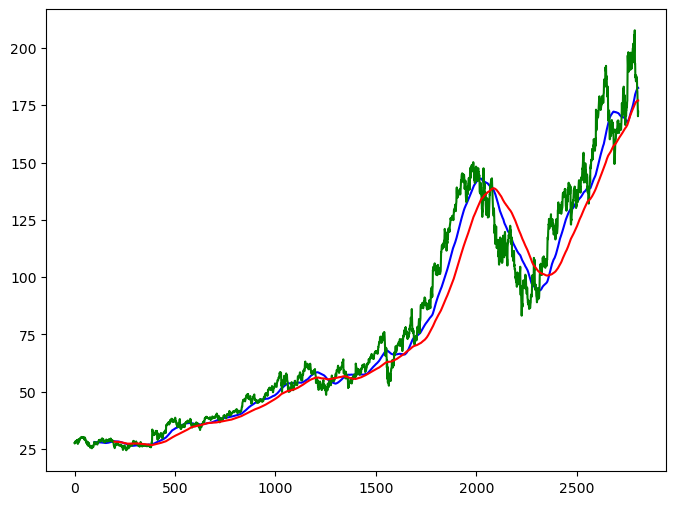

In [38]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'b')
plt.plot(df.Close,'g')
plt.plot(ma_200_days,'r')
plt.show()

In [39]:
 df.isnull().sum()

Price   Ticker
index             0
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (index, )       2807 non-null   int64         
 1   (Date, )        2807 non-null   datetime64[ns]
 2   (Close, GOOG)   2807 non-null   float64       
 3   (High, GOOG)    2807 non-null   float64       
 4   (Low, GOOG)     2807 non-null   float64       
 5   (Open, GOOG)    2807 non-null   float64       
 6   (Volume, GOOG)  2807 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 153.6 KB


In [41]:
df.describe()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG
count,2807.000000,2807,2807.000000,2807.000000,2807.000000,2807.000000,2.807000e+03
mean,1403.000000,2019-07-30 08:05:18.061987840,79.127544,79.927768,78.305377,79.088822,3.230683e+07
min,0.000000,2014-01-02 00:00:00,24.472137,24.642358,24.224211,24.576477,1.584340e+05
25%,701.500000,2016-10-13 12:00:00,38.683508,38.931862,38.497675,38.749768,2.140330e+07
50%,1403.000000,2019-07-31 00:00:00,60.053223,60.432364,59.517451,59.982479,2.756600e+07
75%,2104.500000,2022-05-11 12:00:00,117.756889,118.981732,116.285544,117.574296,3.672600e+07
max,2806.000000,2025-02-28 00:00:00,207.710007,208.699997,204.259995,204.500000,2.234866e+08
std,810.455428,NaN,46.826725,47.340696,46.330817,46.806787,1.852614e+07


# Training and Testing of Dataset


In [42]:
df_train=pd.DataFrame(df.Close[0:int(len(df)*0.80)]) #IT Only CONTAINS closing prices for the first 80% of the dataset.

In [43]:
df_test=pd.DataFrame(df.Close[int(len(df)*0.80):len(df)]) #it contains closing prices for the last 20% of dataset

In [44]:
df_train.shape[0] #0 is the number of rows

2245

In [45]:
df_test.shape[0] 

562

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))  # Scaling between 0 and 1
df_train_scaled = scaler.fit_transform(df_train)

In [47]:
x=[]
y=[]

for i in range(100,df_train_scaled.shape[0]):
    x.append(df_train_scaled[i-100:i])
    y.append(df_train_scaled[i])
    
x, y = np.array(x), np.array(y)

# model selection (LSTM)

In [48]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential 

In [49]:
 model=Sequential()

In [50]:
model.add(LSTM(units=50,activation ='relu',return_sequences =True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation ='relu',return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation ='relu',return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

D:\anaconda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - loss: 0.0527
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0063
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0059
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0064
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - loss: 0.0052
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 0.0049
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - loss: 0.0054
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0043
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - loss: 0.0036
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0042
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - loss: 0.0038
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 0.0042
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - loss: 0.0033
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0081
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

# model evaluation 

In [54]:
past_100_days=df_train.tail(100)

In [56]:
df_test=pd.concat([past_100_days,df_test],ignore_index=True) #we have merged the past 100 days data with the test data to predict 

In [61]:
df_test_scaled = scaler.fit_transform(df_test) #scaling it between 0-1

In [62]:
x=[]
y=[]

for i in range(100,df_test_scaled.shape[0]): 
    x.append(df_test_scaled[i-100:i])
    y.append(df_test_scaled[i])
    
x, y = np.array(x), np.array(y)

In [63]:
y_predict=model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step


In [64]:
y_predict

array([[0.14445132],
       [0.1465405 ],
       [0.14921257],
       [0.15256405],
       [0.15664522],
       [0.16144611],
       [0.16693284],
       [0.17306958],
       [0.17977405],
       [0.18688856],
       [0.19415304],
       [0.20133528],
       [0.20830798],
       [0.2150236 ],
       [0.22141597],
       [0.22738254],
       [0.23303315],
       [0.23831986],
       [0.24313967],
       [0.24745873],
       [0.25126877],
       [0.254688  ],
       [0.25784716],
       [0.26075125],
       [0.26358363],
       [0.26676065],
       [0.27039444],
       [0.27438474],
       [0.27852088],
       [0.28243762],
       [0.28564265],
       [0.28774703],
       [0.2886431 ],
       [0.28863275],
       [0.28777924],
       [0.2861117 ],
       [0.2837353 ],
       [0.2808512 ],
       [0.27785504],
       [0.27500376],
       [0.27238294],
       [0.2699406 ],
       [0.2677096 ],
       [0.2657163 ],
       [0.2639866 ],
       [0.262437  ],
       [0.26101553],
       [0.259

In [66]:
s=1/scaler.scale_

In [67]:
y_predict=y_predict*s #predicted values 

In [69]:
y=y*s   #actual values

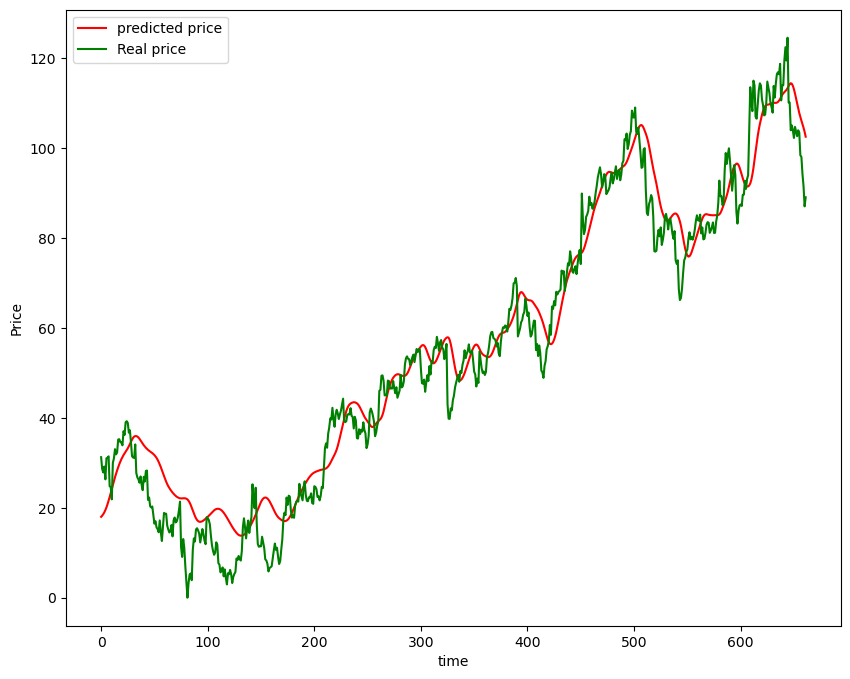

In [71]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="predicted price")
plt.plot(y,'g',label='Real price')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [72]:
model.save('stock predction model.keras')